In [6]:
# solar_system_3d.py

import itertools
import math
import matplotlib.pyplot as plt
from matplotlib import colormaps
from vectors import Vector


class SolarSystem:
    def __init__(self, size, projection_2d=False):
        self.size = size
        self.projection_2d = projection_2d #2d projection on the xy plane
        self.bodies = []

        self.fig, self.ax = plt.subplots(
            1,
            1,
            subplot_kw={"projection": "3d"},
            figsize=(self.size / 50, self.size / 50),
        )
        self.fig.tight_layout()
        # self.ax.view_init(0, 0) #This changes the perspective of the graph
        if self.projection_2d:
            self.ax.view_init(10, 0)
        else:
            self.ax.view_init(0, 0)

    def add_body(self, body):
        self.bodies.append(body)

    def update_all(self):
        self.bodies.sort(key=lambda item: item.position[0])
        for body in self.bodies:
            body.move()
            body.draw()

    def draw_all(self):
        self.ax.set_xlim((-self.size / 2, self.size / 2))
        self.ax.set_ylim((-self.size / 2, self.size / 2))
        self.ax.set_zlim((-self.size / 2, self.size / 2))
        if self.projection_2d:
            self.ax.xaxis.set_ticklabels([])
            self.ax.yaxis.set_ticklabels([])
            self.ax.zaxis.set_ticklabels([])
        else:
            self.ax.axis(False) #Removes grid and axis but only if 2d projection is turned off
        plt.pause(0.001)
        self.ax.clear()

    def calculate_all_body_interactions(self):
        bodies_copy = self.bodies.copy()
        for idx, first in enumerate(bodies_copy):
            for second in bodies_copy[idx + 1:]:
                first.accelerate_due_to_gravity(second)


class SolarSystemBody:
    min_display_size = 10
    display_log_base = 1.3

    def __init__(
            self,
            solar_system,
            mass,
            position=(0, 0, 0),
            velocity=(0, 0, 0),
    ):
        self.solar_system = solar_system
        self.mass = mass
        self.position = position
        self.velocity = Vector(*velocity)
        self.display_size = max(
            math.log(self.mass, self.display_log_base),
            self.min_display_size,
        )
        self.colour = "black"

        self.solar_system.add_body(self)

    def move(self):
        self.position = (
            self.position[0] + self.velocity[0],
            self.position[1] + self.velocity[1],
            self.position[2] + self.velocity[2],
        )

    def draw(self):
        self.solar_system.ax.plot(
            *self.position,
            marker="o",
            markersize=self.display_size + self.position[0] / 30,
            color=self.colour
        )
        if self.solar_system.projection_2d: #second plot is added when projection_2d is True
            self.solar_system.ax.plot(
                self.position[0],
                self.position[1],
                -self.solar_system.size / 2,
                marker="o",
                markersize=self.display_size / 2,
                color=(.5, .5, .5),
            )

    def accelerate_due_to_gravity(self, other):
        distance = Vector(*other.position) - Vector(*self.position)
        distance_mag = distance.get_magnitude()
        force_mag = self.mass * other.mass / (distance_mag ** 2)
        force = distance.normalize() * force_mag
        reverse = 1
        for body in self, other:
            acceleration = force / body.mass
            body.velocity += acceleration * reverse
            reverse = -1


class Sun(SolarSystemBody):
    def __init__(
            self,
            solar_system,
            mass=10_000,
            position=(0, 0, 0),
            velocity=(0, 0, 0),
    ):
        super(Sun, self).__init__(solar_system, mass, position, velocity)
        self.colour = "yellow"


class Planet(SolarSystemBody):
    color_map = colormaps.get_cmap('tab20')  # Choose a colormap: 'vidiris', 'plasma'

    def __init__(
        self,
        solar_system,
        mass=10,
        position=(0, 0, 0),
        velocity=(0, 0, 0),
    ):
        super(Planet, self).__init__(solar_system, mass, position, velocity)
        self.colour = self.color_map(len(solar_system.bodies))  # Assign a color based on the number of bodies
        self.hidden = False  # Adding a flag to indicate if the planet is hidden
        self.trajectory = []  # Initialize an empty list to store the trajectory

    def move(self):
        super().move()  # Call the parent class's move method
        self.trajectory.append(self.position)  # Store the current position in the trajectory

    def draw(self):
        if not self.hidden:  # Check if the planet is hidden
            self.solar_system.ax.plot(
                *self.position,
                marker="o",
                markersize=self.display_size + self.position[0] / 30,
                color=self.colour
            )
            if self.solar_system.projection_2d:
                self.solar_system.ax.plot(
                    self.position[0],
                    self.position[1],
                    -self.solar_system.size / 2,
                    marker="o",
                    markersize=self.display_size / 2,
                    color=(.5, .5, .5),
                )



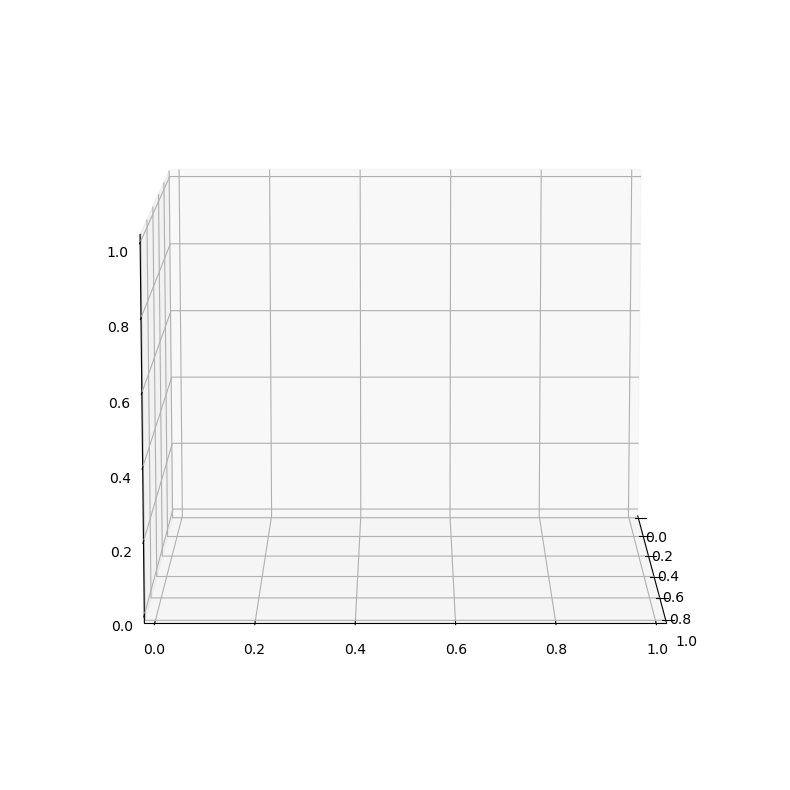

In [7]:
#More complex_solar_system.py
import numpy as np
import matplotlib.pyplot as plt

from solar_system_3d import SolarSystem, Sun, Planet

solar_system5 = SolarSystem(400, projection_2d=True)

sun5 = Sun(solar_system5)

planets5 = (
    Planet(
        solar_system5,
        position=(150, 50, 0),
        velocity=(0, 5, 5),
    ),
    Planet(
        solar_system5,
        mass=20,
        position=(100, 50, 150),
        velocity=(5, 0, 0)
    ),
    Planet(
        solar_system5,
        mass=30,
        position=(200, -50, 150),
        velocity=(5, 0, 0)
    ),
    Planet(
        solar_system5,
        mass=15,
        position=(100, -100, 75),
        velocity=(5, 0, 0)
    ),
    Planet(
        solar_system5,
        mass=10,
        position=(75, -70, 150),
        velocity=(5, 0, 0)
    )
)

# Set the 'hidden' flag for the second planet
planets5[4].hidden = True



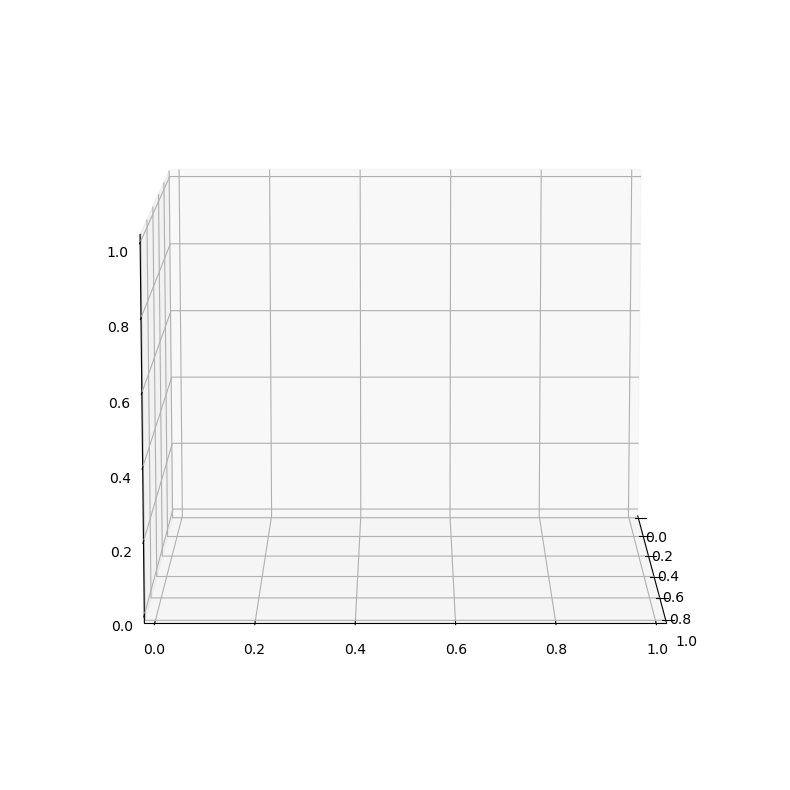

In [8]:
solar_system4 = SolarSystem(400, projection_2d=True)

sun4 = Sun(solar_system4)

planets4 = (
    Planet(
        solar_system4,
        position=(150, 50, 0),
        velocity=(0, 5, 5),
    ),
    Planet(
        solar_system4,
        mass=20,
        position=(100, 50, 150),
        velocity=(5, 0, 0)
    ),
    Planet(
        solar_system4,
        mass=30,
        position=(200, -50, 150),
        velocity=(5, 0, 0)
    ),
    Planet(
        solar_system4,
        mass=15,
        position=(100, -100, 75),
        velocity=(5, 0, 0)
    )
)


In [9]:
# Run simulation
t = 0

while t<=100:
    solar_system5.calculate_all_body_interactions()
    solar_system5.update_all()
    solar_system5.draw_all()
    
    solar_system4.calculate_all_body_interactions()
    solar_system4.update_all()
    solar_system4.draw_all()
    
    t=t+0.5

# Access trajectories after the simulation completes
data_planet1_trajectory = np.array([planets5[0].trajectory])
data_planet2_trajectory = np.array([planets5[1].trajectory])
data_planet3_trajectory = np.array([planets5[2].trajectory])
data_planet4_trajectory = np.array([planets5[3].trajectory])

model_planet1_trajectory = np.array([planets4[0].trajectory])
model_planet2_trajectory = np.array([planets4[1].trajectory])
model_planet3_trajectory = np.array([planets4[2].trajectory])
model_planet4_trajectory = np.array([planets4[3].trajectory])

In [18]:
#Calculate diff
diff_planet1_trajectory = abs(data_planet1_trajectory - model_planet1_trajectory)
diff_planet2_trajectory = abs(data_planet2_trajectory - model_planet2_trajectory)
diff_planet3_trajectory = abs(data_planet3_trajectory - model_planet3_trajectory)
diff_planet4_trajectory = abs(data_planet4_trajectory - model_planet4_trajectory)

#Calculate square error
err_planet1_trajectory = np.sqrt(diff_planet1_trajectory[0][:, 0]**2 + diff_planet1_trajectory[0][:, 1]**2 + diff_planet1_trajectory[0][:, 2]**2)
err_planet2_trajectory = np.sqrt(diff_planet2_trajectory[0][:, 0]**2 + diff_planet2_trajectory[0][:, 1]**2 + diff_planet2_trajectory[0][:, 2]**2)
err_planet3_trajectory = np.sqrt(diff_planet3_trajectory[0][:, 0]**2 + diff_planet3_trajectory[0][:, 1]**2 + diff_planet3_trajectory[0][:, 2]**2)
err_planet4_trajectory = np.sqrt(diff_planet4_trajectory[0][:, 0]**2 + diff_planet4_trajectory[0][:, 1]**2 + diff_planet4_trajectory[0][:, 2]**2)

print(np.mean(err_planet1_trajectory))

0.8487448974246211
